<table align="center" width=50%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Zee Recommender System</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Credit: Sai.Nischitha@scaler.com [Data Scientist and Subject Matter Expert, DSML - ML2]

## Problem Statement:🎥🍿
Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

## Data Description:

#### MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

### RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds
- Each user has at least 20 ratings

#### USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  
Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

### Our Approach:

In this project, we'll be building a recommender system that is going to recommend movies to a user based on their preferences as well as the choices of other users who are similar to them.

#### **What is a Recommender System?**

A recommender engine, or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

#### **Types of Recommender Systems -**

Recommender systems usually make use of either or both *Collaborative Filtering* and *Content-based Filtering* techniques.

#### **Collaberative Filtering**

Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items. By locating peer users/items with a rating history similar to the current user or item, they generate recommendations using this neighborhood.

#### **Content-based Filtering**

Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data & Data Formatting](#Read_Data)**
    - 3.1 -[Movies](#mov)
    - 3.2 -[Ratings](#rat)
    - 3.3 -[Users](#user)
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Merging datasets](#merging)
        - 4.1.2 - [Missing Values](#Missing_Values)
        - 4.1.3 - [Duplicate Values](#Dup)
        - 4.1.4 - [Feature Engineering](#Feat_eng)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Analyze Features](#analyze_fea)
5. **[Recommendations systems](#rec_sys)**
    - 5.1 - [Pearson Correlation](#pear)
    - 5.2 - [Cosine Similarty](#cosine)
         - 5.2.1 - [Item-Based Similarity](#itm_sim)
         - 5.2.2 - [User-Based Similarity](#user_sim)
    - 5.3 - [Nearest Neighbors](#nn)
    - 5.4 - [Matrix Factorization](#mf)
    - 5.5 - [User-Based Approach(optional)](#user_based)
    - 5.6 - [Regression-Based System](#reg)
6. **[Questionnaire](#Quest)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict 
from scipy import sparse
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
from cmfrec import CMF
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# 2. Set Options <a id='set_options'></a>

In [2]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 3. Read Data & Data Formatting<a id='Read_Data'></a>

### 3.1 Movies <a id='mov'></a>

In [3]:
movies = pd.read_fwf('movies.dat', encoding='ISO-8859-1')
print(movies.shape)
movies.head()

(3883, 3)


Movie ID::Title::Genres Unnamed: 1 Unnamed: 2
0  1::Toy Story (1995)::Animation|Children's|Comedy        NaN        NaN
1   2::Jumanji (1995)::Adventure|Children's|Fantasy        NaN        NaN
2        3::Grumpier Old Men (1995)::Comedy|Romance        NaN        NaN
3         4::Waiting to Exhale (1995)::Comedy|Drama        NaN        NaN
4     5::Father of the Bride Part II (1995)::Comedy        NaN        NaN

In [4]:
movies.drop(columns=['Unnamed: 1', 'Unnamed: 2'], axis=1, inplace=True)

delimiter = '::'
movies = movies['Movie ID::Title::Genres'].str.split(delimiter, expand=True)
movies.columns = ['Movie ID', 'Title', 'Genres']

movies.rename(columns={'Movie ID':'MovieID'}, inplace=True)
movies.head()

MovieID                               Title                        Genres
0       1                    Toy Story (1995)   Animation|Children's|Comedy
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy
2       3             Grumpier Old Men (1995)                Comedy|Romance
3       4            Waiting to Exhale (1995)                  Comedy|Drama
4       5  Father of the Bride Part II (1995)                        Comedy

### 3.2 Ratings <a id='rat'></a>

In [5]:
ratings = pd.read_fwf('ratings.dat', encoding='ISO-8859-1')

In [6]:
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimiter, expand=True)
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

print(ratings.shape)
ratings.head()

(1000209, 4)


UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968
3      1    3408      4  978300275
4      1    2355      5  978824291

### 3.3 Users <a id='user'></a>

In [7]:
users = pd.read_fwf('users.dat', encoding='ISO-8859-1')

In [8]:
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimiter, expand=True)
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users1=users.copy()

In [9]:
users.replace({'Age':{'1':  "Under 18",
                      '18':  "18-24",
                      '25':  "25-34",
                      '35':  "35-44",
                      '45':  "45-49",
                      '50':  "50-55",
                      '56':  "56 Above"}}, inplace=True)

In [10]:
users.replace({'Occupation':{'0': "other",
                             '1': "academic/educator",
                             '2': "artist",
                             '3': "clerical/admin",
                             '4': "college/grad student",
                             '5': "customer service",
                             '6': "doctor/health care",
                             '7': "executive/managerial",
                             '8': "farmer",
                             '9': "homemaker",
                             '10': "k-12 student",
                             '11': "lawyer",
                             '12': "programmer",
                             '13': "retired",
                             '14': "sales/marketing",
                             '15': "scientist",
                             '16': "self-employed",
                             '17': "technician/engineer",
                             '18': "tradesman/craftsman",
                             '19': "unemployed",
                             '20': "writer"}}, inplace=True)

In [11]:
print(users.shape)
users.head()

(6040, 5)


UserID Gender       Age            Occupation Zip-code
0      1      F  Under 18          k-12 student    48067
1      2      M  56 Above         self-employed    70072
2      3      M     25-34             scientist    55117
3      4      M     45-49  executive/managerial    02460
4      5      M     25-34                writer    55455

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

In [12]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['Year'] = movies.Title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['Year'] = movies.Year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'Title' column
movies['Title'] = movies.Title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['Title'] = movies['Title'].apply(lambda x: x.strip())
movies.head()

MovieID                        Title                        Genres  Year
0       1                    Toy Story   Animation|Children's|Comedy  1995
1       2                      Jumanji  Adventure|Children's|Fantasy  1995
2       3             Grumpier Old Men                Comedy|Romance  1995
3       4            Waiting to Exhale                  Comedy|Drama  1995
4       5  Father of the Bride Part II                        Comedy  1995

### 4.1.1 Merge all above dataframes <a id='merging'></a>

In [13]:
df_1 = pd.merge(movies, ratings, how='inner', on='MovieID')
df_1.head()

MovieID      Title                       Genres  Year UserID Rating  \
0       1  Toy Story  Animation|Children's|Comedy  1995      1      5   
1       1  Toy Story  Animation|Children's|Comedy  1995      6      4   
2       1  Toy Story  Animation|Children's|Comedy  1995      8      4   
3       1  Toy Story  Animation|Children's|Comedy  1995      9      5   
4       1  Toy Story  Animation|Children's|Comedy  1995     10      5   

   Timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474

In [14]:
data = pd.merge(df_1, users, how='inner', on='UserID')
data.head()

MovieID                               Title  \
0       1                           Toy Story   
1      48                          Pocahontas   
2     150                           Apollo 13   
3     260  Star Wars: Episode IV - A New Hope   
4     527                    Schindler's List   

                                 Genres  Year UserID Rating  Timestamp Gender  \
0           Animation|Children's|Comedy  1995      1      5  978824268      F   
1  Animation|Children's|Musical|Romance  1995      1      5  978824351      F   
2                                 Drama  1995      1      5  978301777      F   
3               Action|Adventure|Fantas  1977      1      4  978300760      F   
4                             Drama|War  1993      1      5  978824195      F   

        Age    Occupation Zip-code  
0  Under 18  k-12 student    48067  
1  Under 18  k-12 student    48067  
2  Under 18  k-12 student    48067  
3  Under 18  k-12 student    48067  
4  Under 18  k-12 student    48067

**Shape of the dataset**

In [15]:
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  1000209
No. of columns:  11


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   Year        996665 non-null   object
 4   UserID      1000209 non-null  object
 5   Rating      1000209 non-null  object
 6   Timestamp   1000209 non-null  object
 7   Gender      1000209 non-null  object
 8   Age         1000209 non-null  object
 9   Occupation  1000209 non-null  object
 10  Zip-code    1000209 non-null  object
dtypes: object(11)
memory usage: 91.6+ MB


In this dataset we have **11 object columns**

### 4.1.2 Missing Values <a id='Missing_Values'></a>

In [17]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [18]:
missing_value.sort_values(by='Percentage', ascending=False)

Missing Value  Percentage
Genres               4065        0.41
Year                 3544        0.35
MovieID                 0        0.00
Title                   0        0.00
UserID                  0        0.00
Rating                  0        0.00
Timestamp               0        0.00
Gender                  0        0.00
Age                     0        0.00
Occupation              0        0.00
Zip-code                0        0.00

We have **2 columns(Genres, Year) with few missing values** in the dataset

**Handling Missing Values**

In [19]:
data.dropna(inplace=True)

**Upon dropping the null values the index range differs thus the indexes need to be reset**

In [20]:
data.reset_index(inplace=True,drop=True)

### 4.1.3 Duplicate Values <a id='Dup'></a>

In [21]:
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


There are **No Duplicate values** present in the dataset

### 4.1.4 Feature Engineering<a id='Feat_eng'></a>

In [22]:
data['Datetime'] = pd.to_datetime(data['Timestamp'], unit='s') #Change the datatype from object to date_time
data['Year']=data['Year'].astype('int32') #Change the datatype from object to Integer
data['Rating']=data['Rating'].astype('int32') #Change the datatype from object to Integer

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996144 entries, 0 to 996143
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     996144 non-null  object        
 1   Title       996144 non-null  object        
 2   Genres      996144 non-null  object        
 3   Year        996144 non-null  int32         
 4   UserID      996144 non-null  object        
 5   Rating      996144 non-null  int32         
 6   Timestamp   996144 non-null  object        
 7   Gender      996144 non-null  object        
 8   Age         996144 non-null  object        
 9   Occupation  996144 non-null  object        
 10  Zip-code    996144 non-null  object        
 11  Datetime    996144 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(9)
memory usage: 83.6+ MB


In the data we have **1 datetime, 2 integer and 9 object data type columns**

In [24]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
data['ReleaseDec'] = pd.cut(data['Year'], bins=bins, labels=labels)

In [25]:
data.head()

MovieID                               Title  \
0       1                           Toy Story   
1      48                          Pocahontas   
2     150                           Apollo 13   
3     260  Star Wars: Episode IV - A New Hope   
4     527                    Schindler's List   

                                 Genres  Year UserID  Rating  Timestamp  \
0           Animation|Children's|Comedy  1995      1       5  978824268   
1  Animation|Children's|Musical|Romance  1995      1       5  978824351   
2                                 Drama  1995      1       5  978301777   
3               Action|Adventure|Fantas  1977      1       4  978300760   
4                             Drama|War  1993      1       5  978824195   

  Gender       Age    Occupation Zip-code            Datetime ReleaseDec  
0      F  Under 18  k-12 student    48067 2001-01-06 23:37:48        90s  
1      F  Under 18  k-12 student    48067 2001-01-06 23:39:11        90s  
2      F  Under 18  k-12 student    48067 2000-12-31 22:29:37        90s  
3      F  Under 18  k-12 student    48067 2000-12-31 22:12:40        70s  
4      F  Under 18  k-12 student    48067 2001-01-06 23:36:35        90s

## 4.2 Understanding the Dataset <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

**Numeric Variables**

In [26]:
data.describe(include=np.number)

Year    Rating
count 996144.00 996144.00
mean    1986.76      3.58
std       14.31      1.12
min     1919.00      1.00
25%     1982.00      3.00
50%     1992.00      4.00
75%     1997.00      4.00
max     2000.00      5.00

From the above table , we can infer:
             
          The maximum value for rating is 5 and where as the minimum value is 1.00 and the average rating is 3.58.

**Categorical Variables**

In [27]:
data.describe(include = object)

MovieID            Title  Genres  UserID  Timestamp  Gender     Age  \
count   996144           996144  996144  996144     996144  996144  996144   
unique    3682             3640     358    6040     457632       2       7   
top       2858  American Beauty  Comedy    4169  975528402       M   25-34   
freq      3428             3428  116691    2303         30  750590  394105   

                  Occupation Zip-code  
count                 996144   996144  
unique                    21     3439  
top     college/grad student    94110  
freq                  130626     3782

From the above table, we can infer:

    1. The movie American Beauty has been rated the most among all the movies with frequency of 3428.
    
    2. Out of all geres the Comedy genre movie has been watched and rated most with the frequency 116691.
    
    3. The user with the UserID - 4169 have watched & rated most of the movies in the dataset.

### 4.2.3 Analyse Features <a id='analyze_fea'></a>

#### Average User Ratings

In [136]:
data.Rating.value_counts()

4    347758
3    260473
5    224639
2    107261
1     56013
Name: Rating, dtype: int64

In [28]:
user_ratings =data[['UserID','Rating']].groupby('UserID').mean()

Text(0, 0.5, 'Frequency')

<Figure size 576x576 with 0 Axes>

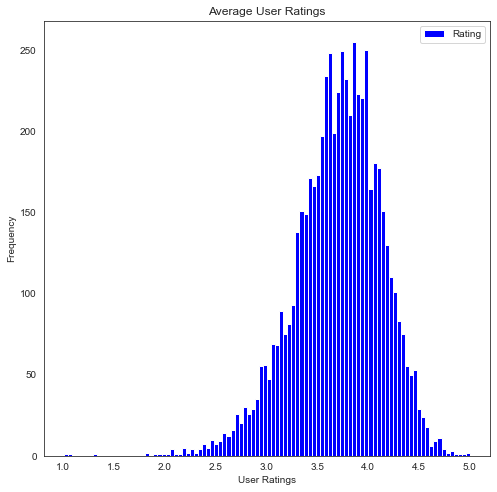

In [29]:
fig = plt.figure(figsize = (8,8))
user_ratings.plot(kind = 'hist', bins = 100, figsize = (8,8), color = 'blue')
plt.plot()
plt.xlabel('User Ratings')
plt.title('Average User Ratings')
plt.ylabel('Frequency')

From above plot, we can see that on average, users are rating movies **3.5-4** more frequently than any other rating. 
This makes sense since people are less inclined to rate movies lower than a 3 if they didn't enjoy the movie. 

#### No.of movies by Release year.

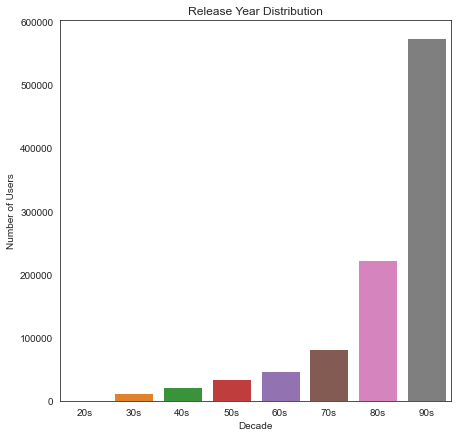

In [30]:
plt.figure(figsize=(7, 7))
sns.countplot(x='ReleaseDec', data=data)
plt.title('Release Year Distribution')
plt.xlabel('Decade')
plt.ylabel('Number of Users')
plt.show()

From the above plot we can infer most of the movies present in the dataset were released in the year **90s**.

#### Top 10 Genres based on movies count

In [31]:
df_mov=data.copy()
df_mov.dropna(inplace=True) # removing null values
all_genres = defaultdict(int)
for i in data['Genres']:
    for genre in i.split('|'): # splitting the geners
        all_genres[genre.strip()] += 1  

<AxesSubplot:xlabel='count', ylabel='Genre'>

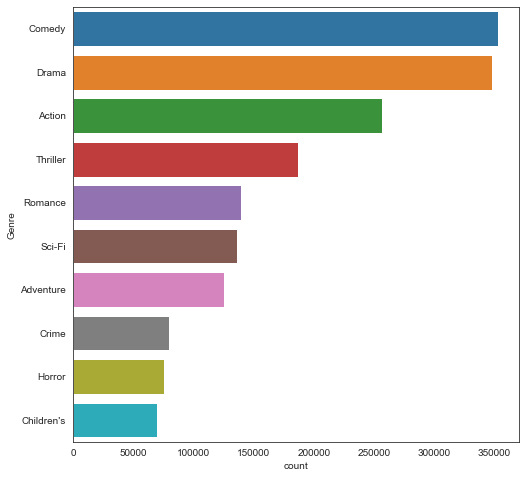

In [32]:
d1=pd.DataFrame(list(dict(all_genres).keys()),columns=['Genre']) # List of genres
d2=pd.DataFrame(list(dict(all_genres).values()),columns=['count']) # Count of each genre
all_genres1=pd.concat(objs=(d1,d2),axis=1) 

all_genres1=all_genres1.sort_values(by='count',ascending=False) #Sorting the genres based on count
all_genres1=all_genres1.head(10) # Considering the top 10 genres
plt.figure(figsize=(8,8))
sns.barplot(all_genres1['count'],all_genres1['Genre']) 

From the above plot we can infer that most the movies in the dataset belongs to **Comedy** and **Drama** genres.

#### **Distribution by Age -**

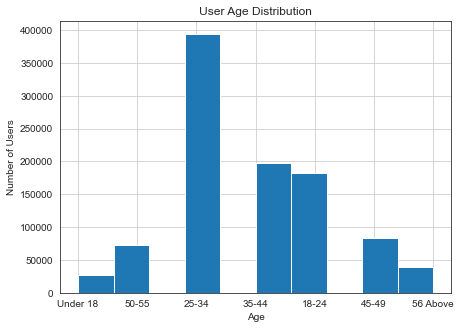

In [33]:
data['Age'].hist(figsize=(7, 5))
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

From the above plot we can infer that **25-34 age group** have watched and rated the most number of movies

#### **Distribution by Gender -**

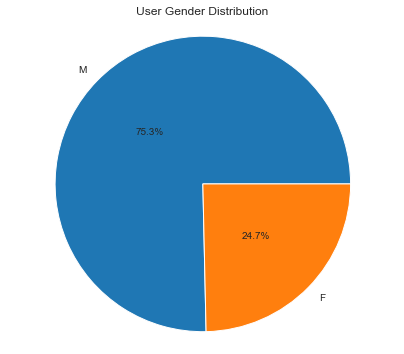

In [34]:
x = data['Gender'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=['M','F'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('User Gender Distribution')
plt.axis('equal')
plt.show()

From the above plot most of the users in our dataset who’ve rated the movies are **Male**.

#### **Distribution by Occupation -**

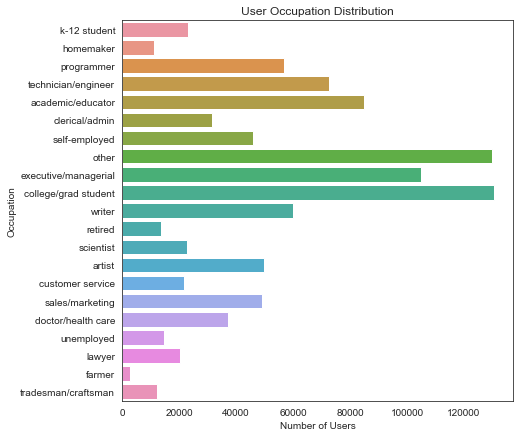

In [35]:
plt.figure(figsize=(7, 7))
sns.countplot(y='Occupation', data=data)
plt.title('User Occupation Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()

From the above plot users belonging to **college/grad student** profession have watched and rated the most movies.

Text(0, 0.5, 'User Rating count')

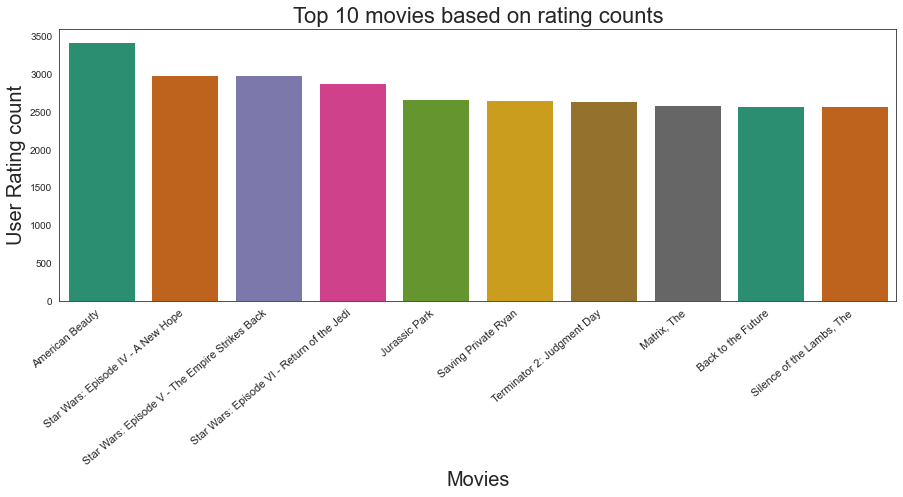

In [36]:
movies_rating_count = data.groupby(by = ['Title'])['Rating'].count().reset_index()[['Title', 'Rating']] ## Counting the ratings based on movies
movies_rating_count.rename(columns = {'Rating': 'totalRatingCount'},inplace=True)

top10_movies=movies_rating_count[['Title', 'totalRatingCount']].sort_values(by = 'totalRatingCount',ascending = False).head(10)

plt.figure(figsize=(15,5))
ax=sns.barplot(x="Title", y="totalRatingCount", data=top10_movies, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 movies based on rating counts',fontsize = 22)
ax.set_xlabel('Movies',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

From the above plot, the movie with maximum number of ratings is **American Beauty**.

# 5. Recommendations systems <a id='rec_sys'></a>

#### User-Interaction Matrix

Creating a pivot table of movie titles and userid and ratings are taken as values.

In [37]:
matrix = pd.pivot_table(data, index='UserID', columns='Title', values='Rating', aggfunc='mean')
matrix.fillna(0, inplace=True) # Imputing 'NaN' values with Zero rating 

print(matrix.shape)

matrix.head(10)

(6040, 3640)


Title   $1,000,000 Duck  'Night Mother  'Til There Was You  'burbs, The  \
UserID                                                                    
1                  0.00           0.00                0.00         0.00   
10                 0.00           0.00                0.00         4.00   
100                0.00           0.00                0.00         0.00   
1000               0.00           0.00                0.00         0.00   
1001               0.00           0.00                0.00         0.00   
1002               0.00           0.00                0.00         0.00   
1003               0.00           0.00                0.00         0.00   
1004               0.00           0.00                0.00         0.00   
1005               0.00           0.00                0.00         0.00   
1006               0.00           0.00                0.00         0.00   

Title   ...And Justice for All  1-900  10 Things I Hate About You  \
UserID                                                              
1                         0.00   0.00                        0.00   
10                        0.00   0.00                        0.00   
100                       0.00   0.00                        0.00   
1000                      0.00   0.00                        0.00   
1001                      0.00   0.00                        0.00   
1002                      0.00   0.00                        0.00   
1003                      0.00   0.00                        0.00   
1004                      0.00   0.00                        0.00   
1005                      0.00   0.00                        0.00   
1006                      0.00   0.00                        0.00   

Title   101 Dalmatians  12 Angry Men  13th Warrior, The  187  \
UserID                                                         
1                 0.00          0.00               0.00 0.00   
10                0.00          3.00               4.00 0.00   
100               0.00          0.00               0.00 0.00   
1000              4.00          0.00               0.00 0.00   
1001              3.00          0.00               0.00 0.00   
1002              0.00          0.00               0.00 0.00   
1003              0.00          0.00               0.00 0.00   
1004              4.00          0.00               0.00 0.00   
1005              0.00          0.00               0.00 0.00   
1006              0.00          0.00               0.00 0.00   

Title   2 Days in the Valley  20 Dates  20,000 Leagues Under the Sea  \
UserID                                                                 
1                       0.00      0.00                          0.00   
10                      0.00      0.00                          4.00   
100                     0.00      0.00                          0.00   
1000                    0.00      0.00                          0.00   
1001                    0.00      0.00                          0.00   
1002                    0.00      0.00                          0.00   
1003                    0.00      0.00                          0.00   
1004                    0.00      0.00                          0.00   
1005                    0.00      0.00                          0.00   
1006                    0.00      0.00                          0.00   

Title   200 Cigarettes  2001: A Space Odyssey  2010  24 7: Twenty Four Seven  \
UserID                                                                         
1                 0.00                   0.00  0.00                     0.00   
10                0.00                   3.00  0.00                     0.00   
100               0.00                   4.00  0.00                     0.00   
1000              0.00                   0.00  0.00                     0.00   
1001              1.00                   0.00  0.00                     0.00   
1002              0.00                   0.00  0.00                     0.00

## 5.1 Pearson Correlation <a id='pear'></a>

Correlation is a measure that tells how closely two variables move in the same or opposite direction. A positive value indicates that they move in the same direction (i.e. if one increases other increases), where as a negative value indicates the opposite.

The most popular correlation measure for numerical data is Pearson’s Correlation. This measures
the degree of linear relationship between two numeric variables and lies between -1 to +1. It is
represented by ‘r’.

* r=1 means perfect positive correlation
* r=-1 means perfect negative correlation
* r=0 means no linear correlation (note, it does not mean no correlation)


#### Item - Based approach

We will take a movie name as an input from the user and see which other 5 (five) movies have maximum correlation with it.

In [137]:
movie_name = input("Enter a movie name: ")
# movie_name = '101 Dalmatians'
movie_rating = matrix[movie_name] # Taking the ratings of that movie
print(movie_rating)

Enter a movie name:  101 Dalmatians


UserID
1      0.00
10     0.00
100    0.00
1000   4.00
1001   3.00
       ... 
995    0.00
996    0.00
997    0.00
998    0.00
999    0.00
Name: 101 Dalmatians, Length: 6040, dtype: float64


In [39]:
similar_movies = matrix.corrwith(movie_rating) #Finding similar movies

sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
sim_df.sort_values('Correlation', ascending=False, inplace=True) # Sorting the values based on correlation

sim_df.iloc[1: , :].head() #Top 5 correlated movies.

Correlation
Title                  
Bambi              0.46
Pinocchio          0.46
Cinderella         0.46
Dumbo              0.46
Peter Pan          0.45

## 5.2 Cosine Similarty <a id='cosine'></a>

Cosine similarity is a measure of similarity between two sequences of numbers. Those sequences are viewed as vectors in a higher dimensional space, and the cosine similarity is defined as the cosine of the angle between them, i.e. the dot product of the vectors divided by the product of their lengths.

The cosine similarity always belongs to the interval [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1.

In [138]:
item_sim.shape

(3640, 3640)

In [40]:
item_sim = cosine_similarity(matrix.T) #Finding the similarity values between item-item using cosine_similarity
item_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

### 5.2.1 Item-Based Similarity<a id='itm_sim'></a>

In [41]:
item_sim_matrix = pd.DataFrame(item_sim, index=matrix.columns, columns=matrix.columns)
item_sim_matrix.head() #Item-similarity Matrix

Title                   $1,000,000 Duck  'Night Mother  'Til There Was You  \
Title                                                                        
$1,000,000 Duck                    1.00           0.07                0.04   
'Night Mother                      0.07           1.00                0.12   
'Til There Was You                 0.04           0.12                1.00   
'burbs, The                        0.08           0.12                0.10   
...And Justice for All             0.06           0.16                0.07   

Title                   'burbs, The  ...And Justice for All  1-900  \
Title                                                                
$1,000,000 Duck                0.08                    0.06   0.00   
'Night Mother                  0.12                    0.16   0.00   
'Til There Was You             0.10                    0.07   0.08   
'burbs, The                    1.00                    0.14   0.00   
...And Justice for All         0.14                    1.00   0.00   

Title                   10 Things I Hate About You  101 Dalmatians  \
Title                                                                
$1,000,000 Duck                               0.06            0.19   
'Night Mother                                 0.08            0.14   
'Til There Was You                            0.13            0.13   
'burbs, The                                   0.19            0.25   
...And Justice for All                        0.08            0.18   

Title                   12 Angry Men  13th Warrior, The  187  \
Title                                                          
$1,000,000 Duck                 0.09               0.06 0.03   
'Night Mother                   0.11               0.05 0.06   
'Til There Was You              0.08               0.07 0.02   
'burbs, The                     0.17               0.20 0.10   
...And Justice for All          0.21               0.12 0.11   

Title                   2 Days in the Valley  20 Dates  \
Title                                                    
$1,000,000 Duck                         0.02      0.02   
'Night Mother                           0.11      0.04   
'Til There Was You                      0.07      0.09   
'burbs, The                             0.18      0.05   
...And Justice for All                  0.20      0.04   

Title                   20,000 Leagues Under the Sea  200 Cigarettes  \
Title                                                                  
$1,000,000 Duck                                 0.14            0.09   
'Night Mother                                   0.07            0.14   
'Til There Was You                              0.03            0.20   
'burbs, The                                     0.19            0.24   
...And Justice for All                          0.17            0.11   

Title                   2001: A Space Odyssey  2010  24 7: Twenty Four Seven  \
Title                                                                          
$1,000,000 Duck                          0.07  0.04                     0.00   
'Night Mother                            0.10  0.08                     0.06   
'Til There Was You                       0.06  0.04                     0.00   
'burbs, The                              0.20  0.19                     0.00   
...And Justice for All                   0.22  0.15                     0.08   

Title                   24-hour Woman  28 Days  \
Title                                            
$1,000,000 Duck                  0.00     0.06   
'Night Mother                    0.06     0.06   
'Til There Was You               0.17     0.12   
'burbs, The                      0.04     0.12   
...And Justice for All           0.02     0.09   

Title                   3 Ninjas: High Noon On Mega Mountain  3 Strikes  \
Title                                                                     
$1,000,000 Duck                                 

In [42]:
user_sim = cosine_similarity(matrix) #Finding the similarity values between user-user using cosine_similarity
user_sim

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

### 5.2.2 User-Based Similarity<a id='user_sim'></a>

In [43]:
user_sim_matrix = pd.DataFrame(user_sim, index=matrix.index, columns=matrix.index)
user_sim_matrix.head()

UserID    1   10  100  1000  1001  1002  1003  1004  1005  1006  1007  1008  \
UserID                                                                        
1      1.00 0.26 0.12  0.21  0.14  0.11  0.12  0.18  0.10  0.05  0.06  0.10   
10     0.26 1.00 0.26  0.28  0.16  0.11  0.14  0.43  0.19  0.10  0.16  0.22   
100    0.12 0.26 1.00  0.31  0.08  0.11  0.36  0.24  0.17  0.10  0.06  0.04   
1000   0.21 0.28 0.31  1.00  0.10  0.05  0.20  0.36  0.33  0.13  0.04  0.08   
1001   0.14 0.16 0.08  0.10  1.00  0.16  0.05  0.15  0.14  0.13  0.02  0.08   

UserID  1009  101  1010  1011  1012  1013  1014  1015  1016  1017  1018  1019  \
UserID                                                                          
1       0.05 0.03  0.16  0.08  0.08  0.05  0.20  0.18  0.13  0.15  0.18  0.11   
10      0.12 0.21  0.35  0.20  0.15  0.16  0.16  0.39  0.20  0.29  0.24  0.33   
100     0.06 0.35  0.26  0.14  0.09  0.02  0.30  0.20  0.17  0.15  0.34  0.19   
1000    0.12 0.28  0.25  0.12  0.12  0.05  0.18  0.22  0.09  0.20  0.36  0.20   
1001    0.20 0.07  0.25  0.07  0.04  0.07  0.06  0.30  0.29  0.10  0.07  0.17   

UserID  102  1020  1021  1022  1023  1024  1025  1026  1027  1028  1029  103  \
UserID                                                                         
1      0.12  0.03  0.09  0.12  0.10  0.02  0.03  0.00  0.14  0.05  0.19 0.03   
10     0.16  0.11  0.19  0.11  0.13  0.14  0.08  0.04  0.15  0.08  0.30 0.15   
100    0.01  0.18  0.20  0.07  0.09  0.07  0.07  0.03  0.21  0.10  0.16 0.22   
1000   0.10  0.14  0.17  0.06  0.05  0.02  0.12  0.03  0.15  0.07  0.22 0.17   
1001   0.18  0.15  0.10  0.27  0.05  0.07  0.12  0.13  0.08  0.05  0.16 0.10   

UserID  1030  1031  1032  1033  1034  1035  1036  1037  1038  1039  104  1040  \
UserID                                                                          
1       0.05  0.06  0.18  0.03  0.19  0.14  0.14  0.02  0.18  0.03 0.05  0.17   
10      0.24  0.27  0.23  0.20  0.33  0.13  0.17  0.05  0.18  0.06 0.09  0.33   
100     0.40  0.39  0.09  0.14  0.16  0.22  0.19  0.05  0.13  0.00 0.03  0.23   
1000    0.34  0.32  0.14  0.13  0.23  0.13  0.13  0.06  0.09  0.00 0.07  0.23   
1001    0.09  0.08  0.23  0.10  0.15  0.10  0.08  0.20  0.16  0.08 0.13  0.13   

UserID  1041  1042  1043  1044  1045  1046  1047  1048  1049  105  1050  1051  \
UserID                                                                          
1       0.05  0.08  0.08  0.15  0.06  0.03  0.14  0.15  0.07 0.10  0.14  0.25   
10      0.07  0.25  0.10  0.23  0.10  0.13  0.26  0.10  0.11 0.16  0.28  0.46   
100     0.08  0.05  0.09  0.19  0.00  0.09  0.26  0.14  0.18 0.26  0.16  0.21   
1000    0.04  0.05  0.06  0.26  0.04  0.09  0.20  0.05  0.09 0.45  0.14  0.24   
1001    0.08  0.02  0.06  0.02  0.14  0.05  0.14  0.19  0.14 0.05  0.37  0.31   

UserID  1052  1053  1054  1055  1056  1057  1058  1059  106  1060  1061  1062  \
UserID                                                                          
1       0.06  0.05  0.05  0.14  0.06  0.21  0.12  0.21 0.05  0.00  0.18  0.15   
10      0.14  0.19  0.23  0.20  0.14  0.30  0.34  0.34 0.17  0.11  0.16  0.29   
100     0.05  0.27  0.11  0.05  0.04  0.26  0.32  0.21 0.09  0.11  0.05  0.08   
1000    0.02  0.33  0.15  0.11  0.16  0.29  0.28  0.21 0.06  0.10  0.20  0.20   
1001    0.05  0.15  0.13  0.17  0.04  0.17  0.25  0.25 0.07  0.13  0.08  0.12   

UserID  1063  1064  1065  1066  1067  1068  1069  107  1070  1071  1072  1073  \
UserID                                                                          
1       0.10  0.12  0.03  0.10  0.12  0.24  0.03 0.12  0.04  0.07  0.23  0.07   
10      0.25  0.20  0.13  0.28  0.19  0.39  0.12 0.19  0.02  0.19  0.24  0.17   
100     0.26  0.17  0.03  0.20  0.18  0.19  0.10 0.17  0.13  0.19  0.17  0.13   
1000    0.30  0.15  0.01  0.14  0.11  0.18  0.04 0.13  0.04  0.11  0.17  0.09   
1001    0.14  0.24  0.21  0.13  0.17  0.23  0.29 0.04  0.08  0.12  0.15  0.11   

UserID  1074  1075  1076  1077  1078  1079  1

## 5.3 Nearest Neighbors <a id='nn'></a>

In [44]:
W = NearestNeighbors(metric='cosine') 
model_knn.fit(matrix.T)

NearestNeighbors(metric='cosine')

In [45]:
##The distances and indices are being calculated with neighbors being 6
distances, indices = model_knn.kneighbors(matrix.T, n_neighbors= 6)

In [46]:
result = pd.DataFrame(indices, columns=['Title1', 'Title2', 'Title3', 'Title4', 'Title5','Title6'])
result.head()
#The result dataframe consits of the different indices of movies based on the distance

Title1  Title2  Title3  Title4  Title5  Title6
0       0     735     416     286     584    3247
1       1     807      72    2167    3036    3369
2       2    1627    2529    3320    2588    1999
3       3    1457    2169    1308    1047    3511
4       4      26     726     894     495     944

In [47]:
##With this for loop replacing the indices in the result dataframe with movie titles of that corresponding ones
result2 = result.copy()
for i in range(1, 7):
    movies = pd.DataFrame(matrix.T.index).reset_index()
    movies = movies.rename(columns={'index':f'Title{i}'})
    result2 = pd.merge(result2, movies, on=[f'Title{i}'], how='left')
    result2 = result2.drop(f'Title{i}', axis=1)
    result2 = result2.rename(columns={'Title':f'Title{i}'})
result2.head()

Title1                           Title2  \
0         $1,000,000 Duck  Computer Wore Tennis Shoes, The   
1           'Night Mother               Cry in the Dark, A   
2      'Til There Was You                     If Lucy Fell   
3             'burbs, The         Harry and the Hendersons   
4  ...And Justice for All                       52 Pick-Up   

               Title3                           Title4                 Title5  \
0  Blackbeard's Ghost          Barefoot Executive, The             Candleshoe   
1        Agnes of God                   Mommie Dearest        Sophie's Choice   
2     Picture Perfect  To Gillian on Her 37th Birthday        Practical Magic   
3      Money Pit, The                  Ghostbusters II      European Vacation   
4                Coma                      Deliverance  Boys from Brazil, The   

                   Title6  
0          That Darn Cat!  
1  Trip to Bountiful, The  
2                Mad Love  
3     Weekend at Bernie's  
4       Dog Day Afternoon

In [48]:
# movie_name = input("Enter a movie name: ")
# result2.loc[result2['Title1']==movie_name] #5 nearest movies for the movie present in Title1.

## 5.4 Matrix Factorization <a id='mf'></a>

Creating a pivot table of movie titles and userid and ratings are taken as values.

In [49]:
rm = data.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
rm.head()

MovieID    1   10  100  1000  1002  1003  1004  1005  1006  1007  1008  1009  \
UserID                                                                         
1       5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
10      5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  5.00   
100     0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1000    5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1001    4.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

MovieID  101  1010  1011  1012  1013  1014  1015  1016  1017  1018  1019  102  \
UserID                                                                          
1       0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
10      0.00  0.00  0.00  3.00  0.00  0.00  3.00  5.00  0.00  0.00  4.00 0.00   
100     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1001    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1020  1021  1022  1023  1024  1025  1026  1027  1028  1029  103  \
UserID                                                                     
1        0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00  5.00  5.00 0.00   
10       3.00  0.00  5.00  5.00  0.00  4.00  0.00  0.00  5.00  0.00 0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000     0.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00  3.00 0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1030  1031  1032  1033  1034  1035  1036  1037  1038  1039  104  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00 0.00   
10       3.00  4.00  4.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00 3.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  4.00  0.00  0.00  0.00 0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1040  1041  1042  1043  1044  1046  1047  1049  105  1050  1051  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
10       0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  2.00 0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   

MovieID  1053  1054  1055  1056  1057  1058  1059  106  1060  1061  1062  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
10       0.00  0.00  0.00  0.00  0.00  0.00  5.00 0.00  0.00  0.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  2.00 0.00  0.00  0.00  0.00   

MovieID  1063  1064  1066  1067  1068  1069  107  1070  1071  1073  1076  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
10       0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  5.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
1001     2.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   

MovieID  1077  1078  1079  108  1080  1081  1082  1083  1084  1085  1086  \
UserID                                                                     
1        0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00

In [50]:
user_itm = data[['UserID', 'MovieID', 'Rating']].copy()
user_itm.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
user_itm.head(2)

UserId ItemId  Rating
0      1      1       5
1      1     48       5

In [51]:
print(user_itm.shape)
print("No.of Users:",len(user_itm['UserId'].unique()))
print("No.of Items:",len(user_itm['ItemId'].unique()))

(996144, 3)
No.of Users: 6040
No.of Items: 3682


In [52]:
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False) 
model.fit(user_itm) #Fitting the model

Collective matrix factorization model
(explicit-feedback variant)


In [53]:
model.A_.shape, model.B_.shape #model.A_ gives the embeddings of Users and model.B_ gives the embeddings of Items.xx

((6040, 4), (3682, 4))

In [54]:
user_itm.Rating.mean(), model.glob_mean_  # Average rating and Global Mean

(3.57998542379415, 3.5799853801727295)

In [55]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_ #Calculating the predicted ratings

In [56]:
rmse = mean_squared_error(rm.values[rm > 0], rm__[rm > 0], squared=False) # calculating rmse value
print('Root Mean Squared Error: {:.3f}'.format(rmse)) 

Root Mean Squared Error: 1.417


In [57]:
mape =  mean_absolute_percentage_error(rm.values[rm > 0], rm__[rm > 0]) #calculating mape value
print('Mean Absolute Percentage Error: {:.3f}'.format(mape))

Mean Absolute Percentage Error: 0.410


**Embeddings for user-user similarity.**

In [58]:
user=cosine_similarity(model.A_)

user_sim_matrix = pd.DataFrame(user, index=matrix.index, columns=matrix.index)
user_sim_matrix.head()  #User similarity matrix using the embeddings from matrix factorization

UserID     1    10   100  1000  1001  1002  1003  1004  1005  1006  1007  \
UserID                                                                     
1       1.00 -0.04  0.33 -0.24  0.78  0.38  0.02 -0.61 -0.46 -0.53 -0.41   
10     -0.04  1.00 -0.50  0.09  0.56  0.29  0.11 -0.59  0.13  0.77  0.27   
100     0.33 -0.50  1.00  0.66 -0.04  0.53  0.72  0.49  0.44 -0.23  0.14   
1000   -0.24  0.09  0.66  1.00 -0.16  0.58  0.93  0.58  0.91  0.56  0.58   
1001    0.78  0.56 -0.04 -0.16  1.00  0.58  0.02 -0.86 -0.37  0.02 -0.03   

UserID  1008  1009  101  1010  1011  1012  1013  1014  1015  1016  1017  1018  \
UserID                                                                          
1       0.43  0.84 0.03  0.09 -0.44 -0.42  0.15  0.78  0.19 -0.09  0.63 -0.30   
10      0.37 -0.24 0.82  0.90  0.84  0.55  0.09  0.45  0.49  0.97  0.67 -0.31   
100     0.60  0.77 0.02 -0.16 -0.33  0.19  0.41  0.34  0.22 -0.32  0.09  0.25   
1000    0.70  0.24 0.54  0.33  0.42  0.84  0.44  0.21  0.45  0.31  0.16  0.26   
1001    0.53  0.56 0.56  0.66  0.19  0.00  0.34  0.91  0.58  0.49  0.86 -0.25   

UserID  1019   102  1020  1021  1022  1023  1024  1025  1026  1027  1028  \
UserID                                                                     
1       0.09  0.59  0.53 -0.29  0.36 -0.18 -0.44 -0.40 -0.45  0.80  0.13   
10     -0.42  0.11 -0.36 -0.02  0.52 -0.30  0.79  0.79  0.33 -0.39 -0.32   
100     0.91  0.16  0.94  0.30  0.48  0.82 -0.14 -0.18  0.31  0.69  0.38   
1000    0.75 -0.08  0.55  0.51  0.69  0.90  0.61  0.55  0.87  0.09  0.15   
1001   -0.12  0.38  0.26 -0.08  0.58 -0.37  0.11  0.20 -0.25  0.34  0.10   

UserID  1029   103  1030  1031  1032  1033  1034  1035  1036  1037  1038  \
UserID                                                                     
1      -0.19 -0.10  0.01 -0.04  0.66 -0.15 -0.65  0.53 -0.03 -0.68  0.21   
10      0.30  0.01  0.78  0.67 -0.65  0.49  0.01  0.20  0.60 -0.32 -0.25   
100     0.06  0.76  0.13 -0.08  0.70  0.41  0.16  0.72  0.00 -0.04  0.95   
1000    0.36  0.98  0.66  0.38 -0.00  0.90  0.58  0.67  0.39  0.14  0.85   
1001    0.19 -0.11  0.47  0.23  0.22  0.18 -0.40  0.56  0.47 -0.61  0.01   

UserID  1039   104  1040  1041  1042  1043  1044  1045  1046  1047  1048  \
UserID                                                                     
1      -0.62 -0.03 -0.14  0.32  0.50  0.53  0.24 -0.03  0.86  0.08  0.76   
10      0.23  0.45  0.53  0.87 -0.13  0.30 -0.35 -0.54  0.40 -0.18  0.01   
100     0.02  0.32  0.35 -0.08  0.69  0.35  0.93  0.87  0.04  0.70  0.75   
1000    0.54  0.69  0.86  0.29  0.42  0.27  0.73  0.72 -0.22  0.65  0.44   
1001   -0.24  0.35  0.15  0.74  0.45  0.73  0.04 -0.42  0.98  0.09  0.58   

UserID  1049   105  1050  1051  1052  1053  1054  1055  1056  1057  1058  \
UserID                                                                     
1      -0.73  0.02  0.02 -0.21  0.14 -0.06 -0.07  0.22  0.76  0.52 -0.24   
10      0.30 -0.30  0.55  0.07 -0.15 -0.51  0.25  0.49 -0.47 -0.59 -0.06   
100     0.12  0.85  0.30  0.39  0.43  0.92  0.61  0.10  0.85  0.64  0.72   
1000    0.79  0.82  0.73  0.62  0.31  0.80  0.94  0.28  0.25  0.05  0.97   
1001   -0.44 -0.25  0.24  0.02  0.20 -0.37  0.03  0.62  0.32  0.18 -0.21   

UserID  1059  106  1060  1061  1062  1063  1064  1065  1066  1067  1068  1069  \
UserID                                                                          
1      -0.08 0.64  0.57  0.47 -0.06  0.02  0.47 -0.31  0.72  0.35 -0.16 -0.46   
10      0.13 0.36 -0.46  0.10  0.54  0.72  0.80 -0.21  0.56 -0.16  0.45  0.57   
100     0.69 0.20  0.73  0.80  0.37  0.18 -0.29  0.64  0.08  0.51  0.28  0.12   
1000    0.97 0.10  0.21  0.73  0.85  0.68 -0.10  0.80  0.03  0.27  0.75  0.79   
1001    0.04 0.61  0.29  0.45  0.22  0.38  0.79 -0.28  0.84  0.35  0.02  0.01   

UserID   107  1070  1071  1072  1073  1074  1075  1076  1077  1078  1079  \
UserID                                                                     
1      -0.43  0.85  0.71 -0.34 -0.29 -0.12 -0.0

In [59]:
itm=cosine_similarity(model.B_)

itm_sim_matrix = pd.DataFrame(itm, index=user_itm['ItemId'].unique(), columns=user_itm['ItemId'].unique())
itm_sim_matrix.head()#Item similarity matrix using the embeddings from matrix factorization

1    48  150   260   527  531  588  594  595   608  661   720   745  \
1    1.00 -0.02 0.95  0.90  0.94 0.70 0.91 0.76 0.88  0.67 0.34  0.88  0.88   
48  -0.02  1.00 0.11 -0.37 -0.34 0.50 0.39 0.41 0.42 -0.46 0.42 -0.34 -0.44   
150  0.95  0.11 1.00  0.88  0.88 0.59 0.93 0.65 0.86  0.45 0.19  0.70  0.73   
260  0.90 -0.37 0.88  1.00  0.98 0.32 0.68 0.41 0.60  0.69 0.04  0.82  0.91   
527  0.94 -0.34 0.88  0.98  1.00 0.46 0.73 0.55 0.68  0.74 0.13  0.91  0.96   

      783  914  919   938  1022  1028  1029  1035  1097  1193  1197  1207  \
1    0.28 0.89 0.95  0.34  0.76  0.80  0.71  0.76  0.97  0.85  0.95  0.92   
48   0.92 0.30 0.02  0.78  0.55  0.47  0.52  0.52  0.20 -0.47 -0.30 -0.21   
150  0.31 0.82 0.82  0.29  0.71  0.75  0.61  0.74  0.97  0.71  0.89  0.76   
260 -0.14 0.61 0.76 -0.11  0.39  0.46  0.33  0.41  0.80  0.91  0.98  0.80   
527 -0.05 0.72 0.86  0.03  0.51  0.58  0.46  0.53  0.85  0.94  0.99  0.91   

     1246  1270  1287  1545  1566  1721  1836  1907  1961  1962  2018  2028  \
1    0.94  0.92  0.98  0.53  0.45  0.64 -0.20  0.80  0.97  0.93  0.73  0.88   
48  -0.04  0.04 -0.05  0.24  0.86  0.62  0.32  0.56 -0.05  0.34  0.48 -0.30   
150  0.96  0.98  0.98  0.32  0.56  0.81 -0.35  0.88  0.97  0.90  0.63  0.90   
260  0.94  0.91  0.94  0.20  0.14  0.45 -0.40  0.54  0.94  0.68  0.36  0.99   
527  0.91  0.87  0.95  0.37  0.15  0.43 -0.34  0.58  0.93  0.75  0.50  0.95   

     2294  2321  2340  2355  2398  2687  2692  2762  2791  2797  2804  2918  \
1    0.60  0.86  0.21  0.97  0.88  0.76  0.68  0.91  0.73  0.95  0.94  0.84   
48   0.66  0.25  0.80  0.18  0.38  0.63 -0.48 -0.27 -0.35  0.26 -0.32 -0.28   
150  0.61  0.80  0.42  0.93  0.84  0.82  0.52  0.92  0.68  0.96  0.85  0.84   
260  0.31  0.67  0.05  0.80  0.59  0.46  0.77  0.99  0.86  0.79  0.97  0.95   
527  0.34  0.71 -0.03  0.84  0.69  0.51  0.78  0.96  0.80  0.81  0.98  0.89   

     3105  3114  3186  3408   17   34  266   296  364  368  377   383   569  \
1    0.93  1.00  0.61  0.91 0.81 0.83 0.46  0.54 0.90 0.43 0.65  0.18  0.09   
48   0.24 -0.08  0.59  0.31 0.31 0.21 0.48 -0.62 0.31 0.47 0.62  0.70  0.99   
150  0.96  0.94  0.69  0.98 0.69 0.67 0.67  0.42 0.98 0.65 0.82  0.41  0.23   
260  0.80  0.92  0.41  0.77 0.49 0.53 0.43  0.75 0.77 0.42 0.47  0.09 -0.24   
527  0.80  0.96  0.39  0.77 0.63 0.67 0.31  0.71 0.76 0.29 0.44 -0.03 -0.23   

     590  597  838   912  920  1007  1030  1043  1088  1101  1188  1210  1296  \
1   0.92 0.64 0.75  0.90 0.85  0.03  0.14 -0.18  0.42  0.62  0.56  0.82  0.57   
48  0.20 0.58 0.47 -0.27 0.39  0.99  0.95  0.84  0.88  0.41  0.31 -0.11  0.29   
150 0.99 0.82 0.65  0.73 0.78  0.15  0.19  0.00  0.57  0.83  0.37  0.91  0.37   
260 0.84 0.48 0.38  0.81 0.53 -0.32 -0.25 -0.35  0.11  0.58  0.21  0.92  0.23   
527 0.82 0.44 0.52  0.91 0.65 -0.30 -0.20 -0.43  0.12  0.50  0.38  0.84  0.39   

     1380  1441  1569  1674  1688  1806  1947  1959  2006  2017  2081  2082  \
1    0.71  0.60  0.37  0.98  0.45 -0.16  0.83  0.60  0.55 -0.23  0.83 -0.04   
48   0.68  0.63  0.84  0.15  0.87  0.97  0.29  0.63  0.66  0.94  0.52  0.97   
150  0.80  0.65  0.57  0.92  0.57 -0.07  0.71  0.52  0.74 -0.17  0.82  0.15   
260  0.43  0.35  0.13  0.79  0.11 -0.51  0.52  0.19  0.39 -0.59  0.51 -0.31   
527  0.45  0.35  0.11  0.86  0.15 -0.47  0.66  0.32  0.33 -0.54  0.60 -0.34   

     2100  2396  2406  2469  2506  2802  2858  2966  3072  3074  3501  3508  \
1    0.61  1.00  0.83  0.34  0.29  0.01  0.65  0.78  0.72  0.84  0.59  0.85   
48   0.74 -0.02  0.48  0.81  0.72  0.83 -0.57 -0.29  0.44 -0.13  0.78 -0.28   
150  0.66  0.92  0.92  0.34  0.53  0.18  0.53  0.57  0.60  0.84  0.61  0.85   
260  0.29  0.88  0.64 -0.02  0.16 -0.17  0.82  0.71  0.36  0.90  0.21  0.96   
527  0.33  0.93  0.64  0.03  0.07 -0.24  0.79  0.79  0.50  0.84  0.29  0.90   

     3524  3534  3536  3565  3578  3600  3604  3610  3624  3682  3685  3699  \
1    0.59  0.06  0.78  0.21  0.75 -0.34  0.51 -0.39  0.69  0.63  0.64  0.60   
48   0.62  0.93  0.28  0.85 -0.17  0.94  0.75  0.9

In [60]:
model1 = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model1.fit(user_itm)

Collective matrix factorization model
(explicit-feedback variant)


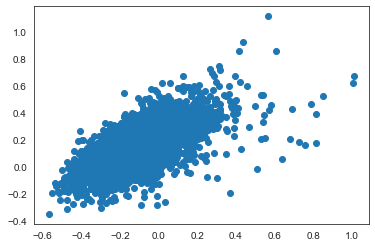

In [61]:
plt.scatter(model1.A_[:, 0], model1.A_[:, 1], cmap = 'hot')

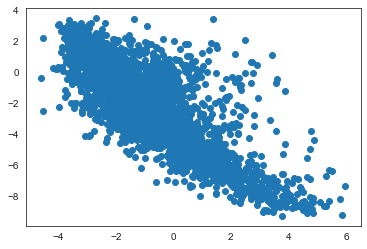

In [62]:
plt.scatter(model1.B_[:, 0], model1.B_[:, 1], cmap='hot')

## 5.5 User-Based Approach(optional)<a id='user_based'></a>

In [63]:
#Taking 6 movies names in random
mov_name = ['Hamlet', 'Dumb & Dumber', 'Ace Ventura: Pet Detective', 'Home Alone','Robin Hood','It Happened One Night']

In [64]:
#Finding the MovieID's for the above movies
mov_id = []
for mov in mov_name:
    id = data[data['Title'] == mov]['MovieID'].iloc[0]
    mov_id.append(id)

In [65]:
mov_id

['1411', '231', '344', '586', '3034', '905']

In [66]:
# mov_rating = list(map(int, input("Rate these movies respectively: ").split())) #Give the random user rating for the movies

mov_rating = [1, 3, 5, 5, 4, 4]

In [67]:
user_choices = pd.DataFrame({'MovieID': mov_id, 'Title': mov_name, 'Rating': mov_rating})
user_choices.sort_values(by='MovieID') #User choices

MovieID                       Title  Rating
0    1411                      Hamlet       1
1     231               Dumb & Dumber       3
4    3034                  Robin Hood       4
2     344  Ace Ventura: Pet Detective       5
3     586                  Home Alone       5
5     905       It Happened One Night       4

In [68]:
other_users = data[data['MovieID'].isin(user_choices['MovieID'].values)] #Finding the similar users who watched same movies
other_users = other_users[['UserID', 'MovieID', 'Rating']]
other_users['UserID'].nunique()

1810

In [69]:
common_movies = other_users.groupby(['UserID']) #Grouping the data based on User who watched the common movies
common_movies = sorted(common_movies, key=lambda x: len(x[1]), reverse=True) #Soring the data so that who watched more number of common movies comes at the top.
common_movies[0] 

('1605',
        UserID MovieID  Rating
 154191   1605     231       2
 154238   1605     344       3
 154312   1605     586       3
 154367   1605     905       4
 154509   1605    1411       3
 154903   1605    3034       4)

In [70]:
top_users = common_movies[:100] #Taking top 100 users who watched same movies as in user choices.

In [71]:
#Calculating pearson correlation
pearson_corr = {}

for user_id, movies in top_users:
    movies = movies.sort_values(by='MovieID') 
    movie_list = movies['MovieID'].values #Taking list of movieid's

    new_user_ratings = user_choices[user_choices['MovieID'].isin(movie_list)]['Rating'].values # Taking the new user rating values based on user choices
    user_ratings = movies[movies['MovieID'].isin(movie_list)]['Rating'].values #Taking the actual rating values of the movies 
    
    corr = pearsonr(new_user_ratings, user_ratings) # Calculating the correlation
    pearson_corr[user_id] = corr[0] #Correlation value for each UserID

In [72]:
pearson_df = pd.DataFrame(columns=['UserID', 'Similarity Index'], data=pearson_corr.items()) # Creating a dataframe for UserId and Correlation values as 'Similarity Index'
pearson_df = pearson_df.sort_values(by='Similarity Index', ascending=False)[:10] #Showing for top 10 Users
pearson_df

UserID  Similarity Index
72   2810              0.97
63   2012              0.90
65    202              0.87
71   2537              0.87
97   3705              0.85
29    531              0.82
56   1631              0.64
4    1088              0.56
48   1266              0.52
43   1112              0.52

In [73]:
users_rating = pearson_df.merge(data, on='UserID', how='inner') #Merging the original data with pearson correlation values
users_rating['Weighted Rating'] = users_rating['Rating'] * users_rating['Similarity Index'] # Calculating the Weighed rating for each user and movie
users_rating = users_rating[['UserID', 'MovieID', 'Rating', 'Similarity Index', 'Weighted Rating']]
users_rating

UserID MovieID  Rating  Similarity Index  Weighted Rating
0      2810       1       4              0.97             3.87
1      2810       2       4              0.97             3.87
2      2810       5       5              0.97             4.84
3      2810       7       4              0.97             3.87
4      2810       8       4              0.97             3.87
...     ...     ...     ...               ...              ...
6713   1112    3915       5              0.52             2.61
6714   1112    3916       5              0.52             2.61
6715   1112    3927       4              0.52             2.09
6716   1112    3943       4              0.52             2.09
6717   1112    3948       3              0.52             1.57

[6718 rows x 5 columns]

In [74]:
# Calculate sum of similarity index and weighted rating for each movie
grouped_ratings = users_rating.groupby('MovieID').sum()[['Similarity Index', 'Weighted Rating']]

recommend_movies = pd.DataFrame()

# Add average recommendation score. 
# We're calculating average recommendation score by dividing the Weighted Rating by the Similarity Index.
recommend_movies['avg_reccomend_score'] = grouped_ratings['Weighted Rating']/grouped_ratings['Similarity Index']
recommend_movies['MovieID'] = grouped_ratings.index
recommend_movies = recommend_movies.reset_index(drop=True)

# Select movies with the highest score i.e. 5
recommend_movies = recommend_movies[(recommend_movies['avg_reccomend_score'] == 5)]

In [75]:
recommendations = data[data['MovieID'].isin(recommend_movies['MovieID'])][['MovieID', 'Title']].sample(10)
recommendations 

MovieID                                Title
275332    2010                           Metropolis
2351       296                         Pulp Fiction
631236     296                         Pulp Fiction
702947     319                        Shallow Grave
134601    2357  Central Station (Central do Brasil)
480043     296                         Pulp Fiction
446018     296                         Pulp Fiction
539218    1611                 My Own Private Idaho
170331    1518                            Breakdown
823625    1172                      Cinema Paradiso

## 5.6 Regression Based Rec Sys<a id='reg'></a>

In [103]:
from sklearn.preprocessing import StandardScaler

In [108]:
movies = pd.read_fwf('movies.dat', encoding='ISO-8859-1')

movies.drop(columns=['Unnamed: 1', 'Unnamed: 2'], axis=1, inplace=True)

delimiter = '::'
movies = movies['Movie ID::Title::Genres'].str.split(delimiter, expand=True)
movies.columns = ['Movie ID', 'Title', 'Genres']

movies.rename(columns={'Movie ID':'MovieID'}, inplace=True)
movies.head()

MovieID                               Title                        Genres
0       1                    Toy Story (1995)   Animation|Children's|Comedy
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy
2       3             Grumpier Old Men (1995)                Comedy|Romance
3       4            Waiting to Exhale (1995)                  Comedy|Drama
4       5  Father of the Bride Part II (1995)                        Comedy

In [109]:
ratings.head()

UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968
3      1    3408      4  978300275
4      1    2355      5  978824291

In [110]:
users1.head()

UserID Gender Age Occupation Zip-code
0      1      F   1         10    48067
1      2      M  56         16    70072
2      3      M  25         15    55117
3      4      M  45          7    02460
4      5      M  25         20    55455

In [111]:
select_movies = ratings.MovieID.value_counts().head(1000).index.to_list()
movies = movies.loc[movies.MovieID.isin(select_movies)]
ratings = ratings.loc[ratings.MovieID.isin(select_movies)]

In [112]:
m = movies.copy()
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres')
m = m.reset_index().pivot(index='MovieID', columns='Genres', values='Title')
m = ~m.isna()
m = m.astype(int)
m.head(2)

Genres   NaN     A  Action  Adv  Adventu  Adventur  Adventure  Animation  \
MovieID                                                                    
1          0  0  0       0    0        0         0          0          1   
10         0  0  0       1    0        0         0          1          0   

Genres   Children'  Children's  Comedy  Crime  D  Documentary  Dr  Dram  \
MovieID                                                                   
1                0           1       1      0  0            0   0     0   
10               0           0       0      0  0            0   0     0   

Genres   Drama  Fant  Fantas  Fantasy  Film-Noir  Horro  Horror  Music  \
MovieID                                                                  
1            0     0       0        0          0      0       0      0   
10           0     0       0        0          0      0       0      0   

Genres   Musical  Mystery  R  Ro  Romance  S  Sci  Sci-  Sci-F  Sci-Fi  Th  \
MovieID                                                                      
1              0        0  0   0        0  0    0     0      0       0   0   
10             0        0  0   0        0  0    0     0      0       0   0   

Genres   Thriller  War  Wester  Western  
MovieID                                  
1               0    0       0        0  
10              1    0       0        0

In [113]:
from datetime import datetime
r = ratings.copy()
r['Timestamp']=r['Timestamp'].astype('int32')
r['Rating']=r['Rating'].astype('int32')
r['hour'] = r['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
r.head()

UserID MovieID  Rating  Timestamp  hour
0      1    1193       5  978300760     3
1      1     661       3  978302109     4
2      1     914       3  978301968     4
3      1    3408       4  978300275     3
4      1    2355       5  978824291     5

In [114]:
users2 = users1.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID')
users2 = users2.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID')
users2.head(2)

UserID Gender Age Occupation Zip-code  Rating  hour
0      1      F   1         10    48067    4.18  3.80
1      2      M  56         16    70072    3.71  2.97

In [115]:
u = users2[['UserID','Age', 'Rating', 'hour']].copy()
u = u.set_index('UserID')
u .columns = ['Age', 'Rating', 'hour']

scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head(2)

Age  Rating  hour
UserID                    
1      -2.30    0.95 -0.91
2       1.97   -0.18 -1.03

In [116]:
ratings.head()

UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968
3      1    3408      4  978300275
4      1    2355      5  978824291

In [117]:
u.head()

Age  Rating  hour
UserID                    
1      -2.30    0.95 -0.91
2       1.97   -0.18 -1.03
3      -0.44    0.36 -1.15
4       1.11    0.98 -1.34
5      -0.44   -1.35  0.30

In [119]:
X = ratings[['MovieID', 'UserID', 'Rating']].copy()
X = X.merge(u.reset_index(), on='UserID', how='right')
X = X.merge(m.reset_index(), on='MovieID', how='right')
X.head()

MovieID UserID Rating_x   Age  Rating_y  hour  NaN     A  Action  Adv  \
0       1      1        5 -2.30      0.95 -0.91    0  0  0       0    0   
1       1      6        4  1.50      0.29 -0.01    0  0  0       0    0   
2       1      8        4 -0.44      0.54 -0.31    0  0  0       0    0   
3       1      9        5 -0.44      0.07 -0.51    0  0  0       0    0   
4       1     10        5  0.34      0.89 -0.54    0  0  0       0    0   

   Adventu  Adventur  Adventure  Animation  Children'  Children's  Comedy  \
0        0         0          0          1          0           1       1   
1        0         0          0          1          0           1       1   
2        0         0          0          1          0           1       1   
3        0         0          0          1          0           1       1   
4        0         0          0          1          0           1       1   

   Crime  D  Documentary  Dr  Dram  Drama  Fant  Fantas  Fantasy  Film-Noir  \
0      0  0            0   0     0      0     0       0        0          0   
1      0  0            0   0     0      0     0       0        0          0   
2      0  0            0   0     0      0     0       0        0          0   
3      0  0            0   0     0      0     0       0        0          0   
4      0  0            0   0     0      0     0       0        0          0   

   Horro  Horror  Music  Musical  Mystery  R  Ro  Romance  S  Sci  Sci-  \
0      0       0      0        0        0  0   0        0  0    0     0   
1      0       0      0        0        0  0   0        0  0    0     0   
2      0       0      0        0        0  0   0        0  0    0     0   
3      0       0      0        0        0  0   0        0  0    0     0   
4      0       0      0        0        0  0   0        0  0    0     0   

   Sci-F  Sci-Fi  Th  Thriller  War  Wester  Western  
0      0       0   0         0    0       0        0  
1      0       0   0         0    0       0        0  
2      0       0   0         0    0       0        0  
3      0       0   0         0    0       0        0  
4      0       0   0         0    0       0        0

In [120]:
X.rename(columns = {'Rating_x':'Rating', 'Rating_y':'User_avg_rating'}, inplace = True)

In [121]:
X.head()

MovieID UserID Rating   Age  User_avg_rating  hour  NaN     A  Action  Adv  \
0       1      1      5 -2.30             0.95 -0.91    0  0  0       0    0   
1       1      6      4  1.50             0.29 -0.01    0  0  0       0    0   
2       1      8      4 -0.44             0.54 -0.31    0  0  0       0    0   
3       1      9      5 -0.44             0.07 -0.51    0  0  0       0    0   
4       1     10      5  0.34             0.89 -0.54    0  0  0       0    0   

   Adventu  Adventur  Adventure  Animation  Children'  Children's  Comedy  \
0        0         0          0          1          0           1       1   
1        0         0          0          1          0           1       1   
2        0         0          0          1          0           1       1   
3        0         0          0          1          0           1       1   
4        0         0          0          1          0           1       1   

   Crime  D  Documentary  Dr  Dram  Drama  Fant  Fantas  Fantasy  Film-Noir  \
0      0  0            0   0     0      0     0       0        0          0   
1      0  0            0   0     0      0     0       0        0          0   
2      0  0            0   0     0      0     0       0        0          0   
3      0  0            0   0     0      0     0       0        0          0   
4      0  0            0   0     0      0     0       0        0          0   

   Horro  Horror  Music  Musical  Mystery  R  Ro  Romance  S  Sci  Sci-  \
0      0       0      0        0        0  0   0        0  0    0     0   
1      0       0      0        0        0  0   0        0  0    0     0   
2      0       0      0        0        0  0   0        0  0    0     0   
3      0       0      0        0        0  0   0        0  0    0     0   
4      0       0      0        0        0  0   0        0  0    0     0   

   Sci-F  Sci-Fi  Th  Thriller  War  Wester  Western  
0      0       0   0         0    0       0        0  
1      0       0   0         0    0       0        0  
2      0       0   0         0    0       0        0  
3      0       0   0         0    0       0        0  
4      0       0   0         0    0       0        0

In [122]:
X = X.drop(columns = ['MovieID', 'UserID'])
y = X.pop('Rating')

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [125]:
rmse = mean_squared_error(y_test, y_pred, squared=False) # calculating rmse value
print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.966


# 6. Questionnaire <a id='Quest'></a>

1. Users of which age group have watched and rated the most number of movies? :- **25-34 age group**

2. Users belonging to which profession have watched and rated the most movies? :- **college/grad student**

3. Most of the users in our dataset who’ve rated the movies are Male. (T/F):- **True**

4. Most of the movies present on our dataset were released in which decade? :- **b.90s**
    a.70s		b. 90s		c. 50s		d.80s

5. The movie with maximum no. of ratings is ___ :- **American Beauty**

6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach. :- **Mrs. Doubtfire, Ace Ventura: Pet, Detective Dumb & Dumber**

7. On the basis of approach, Collaborative Filtering methods can be classified into **Memory-based** and **Model-based**.

8. Pearson Correlation ranges between **-1 to 1** whereas, Cosine Similarity belongs to the interval between **-1 to 1** 

9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.:- **RMSE: 1.417 and MAPE: 0.410**